# III. Modeling

In [1]:
# import libraries

import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,classification_report,roc_curve,auc

In [2]:
# Import data

train_data = pd.read_csv('Data/Balanced_df',index_col=0) # balanced data where # of positive = # of negative
test_data = pd.read_csv('Data/test.csv',index_col=0) # full data with class inbalance


# normalizing the data

train_data = train_data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
test_data = test_data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [3]:
train_data.head()

,points,total_rebounds,assists,blocks,true_shooting_percentage,weight,height,target,position_Forward,position_Guard
17991,0.186209,0.112110,0.075103,0.044326,0.823729,0.264706,0.50,1.0,0.0,1.0
23510,0.464569,0.490408,0.264403,0.125887,0.745763,0.400000,0.50,1.0,0.0,1.0
29886,0.525898,0.155875,0.114198,0.047872,0.849153,0.382353,0.45,1.0,0.0,1.0
17151,0.319670,0.157074,0.174897,0.023050,0.691525,0.264706,0.45,1.0,0.0,1.0
18192,0.227836,0.108513,0.081276,0.019504,0.750847,0.335294,0.50,1.0,0.0,1.0


In [4]:
test_data.head()

,points,total_rebounds,assists,blocks,true_shooting_percentage,weight,height,target,position_Forward,position_Guard
0,0.015199,0.018530,0.011650,0.001773,0.464000,0.368030,0.535714,0.0,1.0,0.0
2,0.203164,0.148834,0.157282,0.021277,0.428444,0.368030,0.500000,0.0,0.0,1.0
3,0.041873,0.052002,0.031068,0.008865,0.435556,0.442379,0.642857,0.0,1.0,0.0
5,0.021092,0.008966,0.033981,0.000000,0.388444,0.219331,0.285714,0.0,0.0,1.0
8,0.035360,0.068141,0.027184,0.008865,0.365333,0.368030,0.571429,0.0,1.0,0.0


In [5]:
#seperating the data

# Training
X_train = train_data.drop('target',axis=1)
y_train = train_data['target']

# Testing 
x_test = test_data.drop('target',axis=1)
y_test = test_data['target']

## Logistic Regression

In [6]:
# logreg = LogisticRegression(fit_intercept=False,C=1e12,max_iter=2000)
logreg = LogisticRegression(fit_intercept=False,solver='liblinear',random_state=4)
model_log = logreg.fit(X_train,y_train)
model_log

LogisticRegression(fit_intercept=False, random_state=4, solver='liblinear')

In [7]:
# models predicted values
logpred_test = logreg.predict(x_test)
logpred_train = logreg.predict(X_train)

In [8]:
# We could subtract the two columns. If values are equal, difference will be zero. Then count number of zeros 

residuals = np.abs(y_train - logpred_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    1103
1.0     419
Name: target, dtype: int64
0.0    0.724704
1.0    0.275296
Name: target, dtype: float64


In [9]:
residuals = np.abs(y_test - logpred_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    16070
1.0     6872
Name: target, dtype: int64
0.0    0.700462
1.0    0.299538
Name: target, dtype: float64


In [10]:
# cf on training data

cf = confusion_matrix(y_train, logpred_train)
cf

array([[542, 219],
       [200, 561]], dtype=int64)

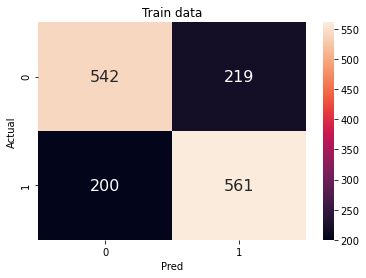

In [11]:
# heat meat for vis
plt.title('Train data')
sns.heatmap(cf,annot=True,annot_kws={'size':16},fmt='g')
plt.xlabel('Pred')
plt.ylabel('Actual');

In [12]:
# cf on test data

cf = confusion_matrix(y_test, logpred_test)
cf

array([[15486,  6695],
       [  177,   584]], dtype=int64)

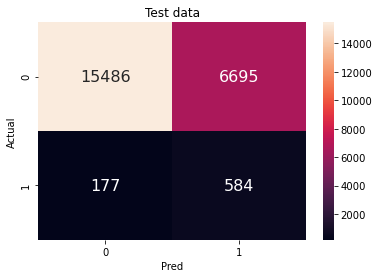

In [13]:
# heat meat for vis
plt.title('Test data')
sns.heatmap(cf,annot=True,annot_kws={'size':16},fmt='g')
plt.xlabel('Pred')
plt.ylabel('Actual');

Focusing sololy on our testing data, the logistic regression model was able to correctly predict 16070 players correctly(15486 undrafted/584 drafted)

In [14]:
# model evaluation

print(classification_report(y_test,logpred_test))

print('Accuracy Score : ' + str(accuracy_score(y_test,logpred_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82     22181
         1.0       0.08      0.77      0.15       761

    accuracy                           0.70     22942
   macro avg       0.53      0.73      0.48     22942
weighted avg       0.96      0.70      0.80     22942

Accuracy Score : 0.7004620346961904


AUC: 0.8101681773434793


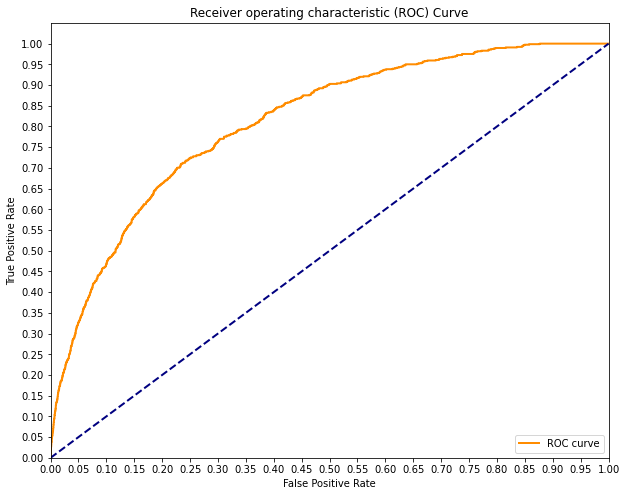

In [15]:
y_score = logreg.fit(X_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model Evaluation

After training the model on a  balanced dataset, equal # of drafted & undrafted players, the model had an accuracy of 70%. Of course heavily skewed because majority of the data is classified as undrafted.Since the motivation of this project is focused on predicting Drafted players correctly i think focusing on the percision of the predicted drafted results is more important. In this case our logistic regression model was only able to correctly predict 8% of drafted players correctly.

## Support Vector Machine

In [16]:
svm = SVC(random_state=4)

In [17]:
svm.fit(X_train,y_train)

SVC(random_state=4)

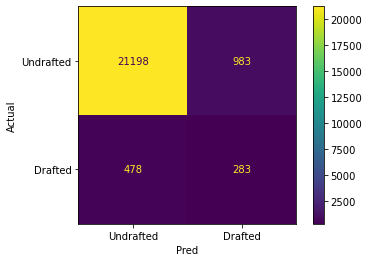

In [18]:
plot_confusion_matrix(svm,x_test,y_test,display_labels=['Undrafted','Drafted'])
plt.xlabel('Pred')
plt.ylabel('Actual')

#save png
plt.savefig('Images/svm_cf_train');

In [19]:
svm.score(x_test,y_test)

0.9363176706477203

### Cross Validation and GridSearchCV()

In [20]:
param_grid = [{'C': [0.5,10,100,1000],
               'gamma' : [1,0.1,0.001,0.0001]}]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5)

optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.1}


This tells us that we will get our best results by setting the params of our SVC model to C = 1000 and gamma = 0.1

In [21]:
# Train another support vector machine with the optimized params

svm_optimized = SVC(random_state=4,C=1000,gamma=0.1)
svm_optimized.fit(X_train,y_train)

SVC(C=1000, gamma=0.1, random_state=4)

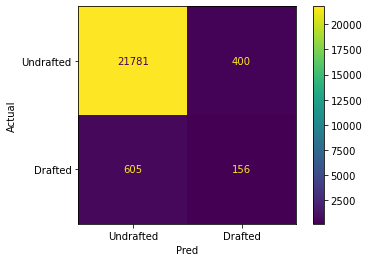

In [22]:
plot_confusion_matrix(svm_optimized,x_test,y_test,display_labels=['Undrafted','Drafted'])
plt.xlabel('Pred')
plt.ylabel('Actual')

#save png
plt.savefig('Images/svm_cf_test');

In [23]:
svm_optimized.score(x_test,y_test)

0.9561938802196844

In [30]:
svmpred_test = svm_optimized.predict(x_test)

svm_report = classification_report(y_test,svmpred_test)
print(svm_report)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     22181
         1.0       0.28      0.20      0.24       761

    accuracy                           0.96     22942
   macro avg       0.63      0.59      0.61     22942
weighted avg       0.95      0.96      0.95     22942



AUC: 0.865149885889837


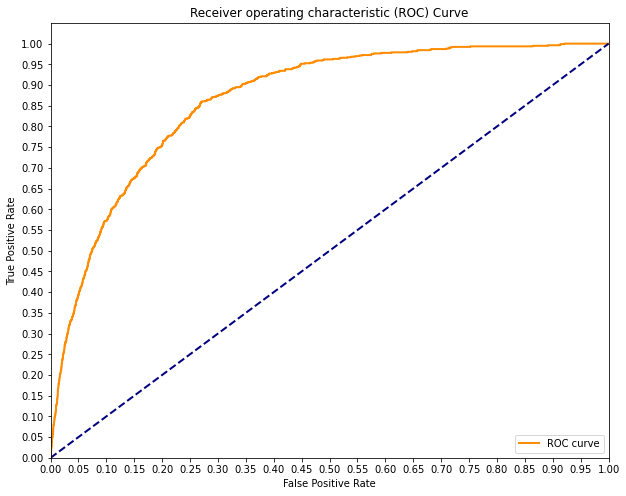

In [26]:
y_score = svm_optimized.fit(X_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

fig = plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# save png
fig.savefig('Images/SVM_ROC')

### Model Evaluation

Again we should be focusing on the percision success of the model as a evaluation of the model. Since predicting those that were drafted is the goal, percision ( TP/ TP+FP) is most important. SVM was able to predict 28% of drafted players correctly.